In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

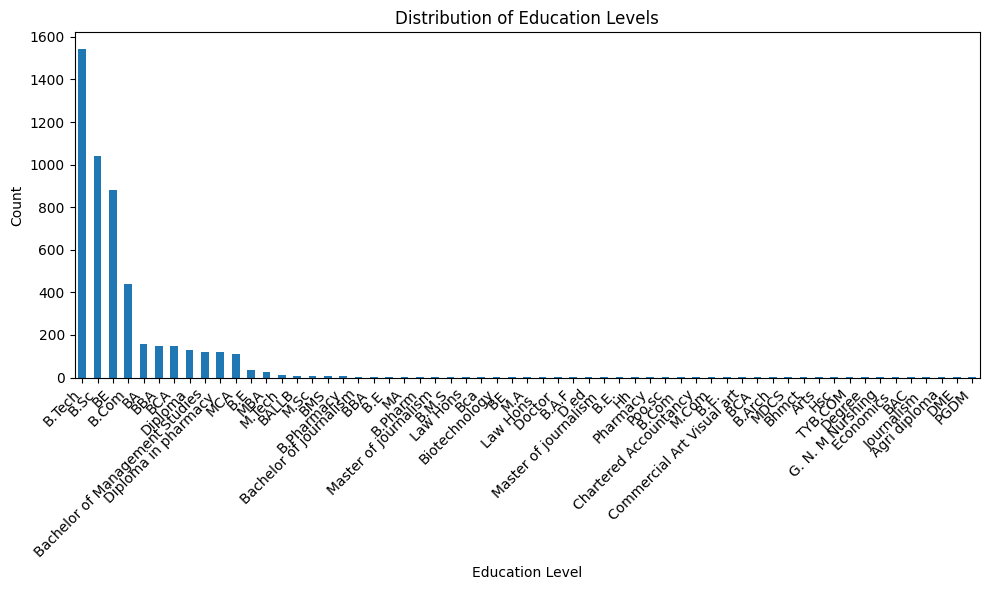

In [55]:
df = pd.read_csv(r"C:\Users\abmir\OneDrive\School\McGill\Bagel\resume_extraction\resume_extraction.csv",nrows=5000)
#create a histogram plot of the education column
plt.figure(figsize=(10, 6))
df['Education'].value_counts().plot(kind='bar')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [56]:
# remove rows with all missing values
df = df[df.notna().all(axis=1)]
len(df)

1425

In [57]:
#reduce the number of rows to 1000
df = df.sample(n=1000)
len(df)
#strip column names of whitespace
df.columns = df.columns.str.strip()


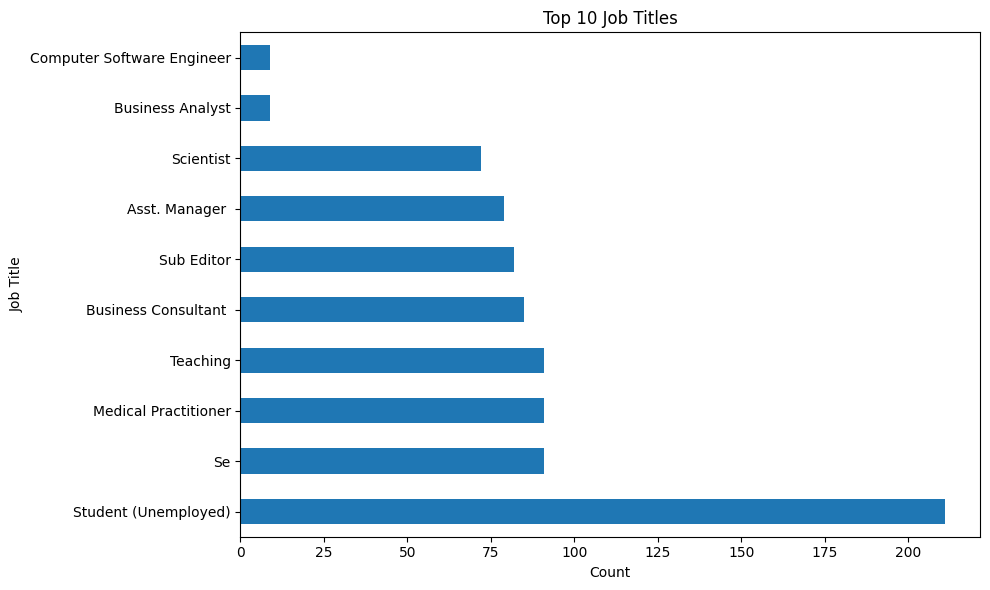

In [58]:
# histogram of column 'Job_title' of the top 10 job titles

# Get the top 10 job titles by frequency
top_10_jobs = df['Job_title'].value_counts().head(10)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
top_10_jobs.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Top 10 Job Titles')
plt.tight_layout()
plt.show()


<Axes: ylabel='Job_title'>

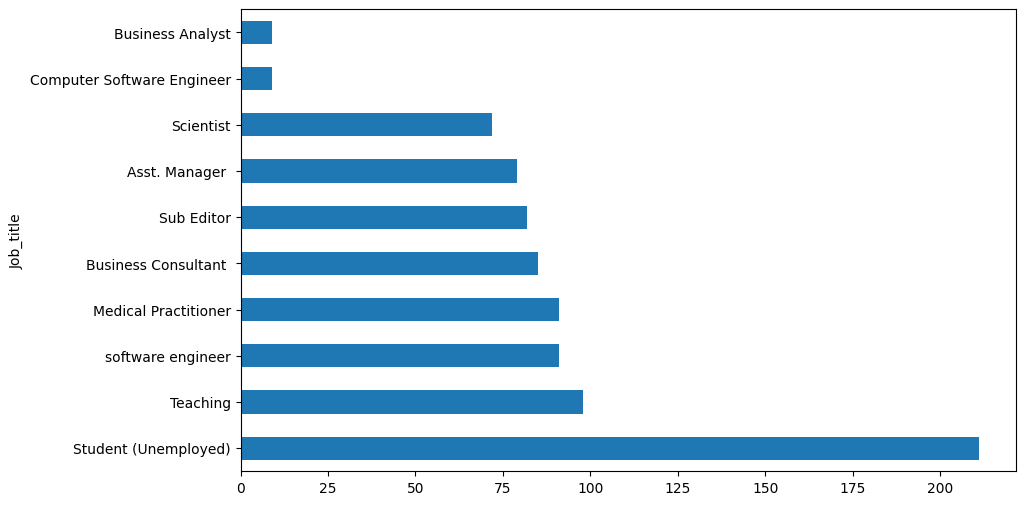

In [59]:
# replace 'se' with 'software engineer' in the 'Job_title' column and combine 'Teacher' and 'Teaching' into 'Teacher'
df['Job_title'] = df['Job_title'].str.replace('Se', 'software engineer')
df['Job_title'] = df['Job_title'].str.replace('Teacher', 'Teaching')

# histogram of column 'Job_title' of the top 10 job titles

# Get the top 10 job titles by frequency
top_10_jobs = df['Job_title'].value_counts().head(10)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
top_10_jobs.plot(kind='barh')


In [60]:
# Import required libraries
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import pandas as pd

# Download required NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Create a tokenizer that handles commas, semicolons, and slashes
tokenizer = RegexpTokenizer(r'[^,;/]+')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a word
def lemmatize_word(word):
    # Get the part of speech
    pos = wordnet.VERB  # Default to verb
    # Lemmatize the word
    return lemmatizer.lemmatize(word.lower(), pos=pos)

# Function to process interests
def process_interests(interests):
    if pd.isna(interests):
        return []
    # Tokenize the interests
    tokens = tokenizer.tokenize(str(interests))
    # Lemmatize each token
    lemmatized = [lemmatize_word(token.strip()) for token in tokens]
    return lemmatized

# Apply the processing to the interests column
df['processed_interests'] = df['interests'].apply(process_interests)

# Display the results
print("Original interests vs Processed interests:")
for orig, proc in zip(df['interests'].head(), df['processed_interests'].head()):
    print(f"Original: {orig}")
    print(f"Processed: {proc}")
    print("---")

Original interests vs Processed interests:
Original: Financial Analysis, Research, Sales/Marketing, Technology, Entrepreneurship
Processed: ['financial analysis', 'research', 'sales', 'market', 'technology', 'entrepreneurship']
---
Original: Research, Trading, Understand Human Behaviour
Processed: ['research', 'trade', 'understand human behaviour']
---
Original: Technology
Processed: ['technology']
---
Original: Research;Sales/Marketing;Teaching;Trading;Understand human behaviour
Processed: ['research', 'sales', 'market', 'teach', 'trade', 'understand human behaviour']
---
Original: Sales/Marketing, Entrepreneurship
Processed: ['sales', 'market', 'entrepreneurship']
---


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abmir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abmir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\abmir\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [61]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer instance
tfidf = TfidfVectorizer(
    max_features=1000,  # Limit the number of features
    stop_words='english',  # Remove common English words
    ngram_range=(1, 2)  # Consider both single words and pairs of words
)

# Convert the lists of interests back to strings for vectorization
interest_texts = [' '.join(interests) for interests in interests_lists]

# Fit and transform the data
tfidf_matrix = tfidf.fit_transform(interest_texts)

# Convert to DataFrame for easier viewing
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf.get_feature_names_out()
)

# Display the shape of the TF-IDF matrix
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

# Display the first few rows of the TF-IDF features
print("\nFirst few TF-IDF features:")
print(tfidf_df.head())

# Display some of the most important terms
print("\nTop 10 most important terms:")
importance = pd.DataFrame({
    'term': tfidf.get_feature_names_out(),
    'importance': tfidf.idf_
}).sort_values('importance', ascending=False)
print(importance.head(10))

TF-IDF matrix shape: (594, 339)

First few TF-IDF features:
   admin  admin construction  agriculture  agriculture services  analysis  \
0    0.0                 0.0          0.0                   0.0       0.0   
1    0.0                 0.0          0.0                   0.0       0.0   
2    0.0                 0.0          0.0                   0.0       0.0   
3    0.0                 0.0          0.0                   0.0       0.0   
4    0.0                 0.0          0.0                   0.0       0.0   

   analysis content  analysis data  analysis entrepreneurship  analysis game  \
0               0.0            0.0                        0.0            0.0   
1               0.0            0.0                        0.0            0.0   
2               0.0            0.0                        0.0            0.0   
3               0.0            0.0                        0.0            0.0   
4               0.0            0.0                        0.0            0.0 

In [62]:
# Import required libraries
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import pandas as pd

# Download required NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Create a tokenizer that handles commas, semicolons, and slashes
tokenizer = RegexpTokenizer(r'[^,;/]+')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a word
def lemmatize_word(word):
    # Get the part of speech
    pos = wordnet.VERB  # Default to verb
    # Lemmatize the word
    return lemmatizer.lemmatize(word.lower(), pos=pos)

# Function to process interests
def process_skills(skills):
    if pd.isna(skills):
        return []
    # Tokenize the interests
    tokens = tokenizer.tokenize(str(skills))
    # Lemmatize each token
    lemmatized = [lemmatize_word(token.strip()) for token in tokens]
    return lemmatized

# Apply the processing to the interests column
df['processed_skills'] = df['skills'].apply(process_skills)

# Display the results
print("Original interests vs Processed interests:")
for orig, proc in zip(df['interests'].head(), df['processed_interests'].head()):
    print(f"Original: {orig}")
    print(f"Processed: {proc}")
    print("---")

Original interests vs Processed interests:
Original: Financial Analysis, Research, Sales/Marketing, Technology, Entrepreneurship
Processed: ['financial analysis', 'research', 'sales', 'market', 'technology', 'entrepreneurship']
---
Original: Research, Trading, Understand Human Behaviour
Processed: ['research', 'trade', 'understand human behaviour']
---
Original: Technology
Processed: ['technology']
---
Original: Research;Sales/Marketing;Teaching;Trading;Understand human behaviour
Processed: ['research', 'sales', 'market', 'teach', 'trade', 'understand human behaviour']
---
Original: Sales/Marketing, Entrepreneurship
Processed: ['sales', 'market', 'entrepreneurship']
---


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abmir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abmir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\abmir\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [63]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer instance
tfidf = TfidfVectorizer(
    max_features=1000,  # Limit the number of features
    stop_words='english',  # Remove common English words
    ngram_range=(1, 2)  # Consider both single words and pairs of words
)

# Convert the lists of interests back to strings for vectorization
skills_texts = [' '.join(skills) for skills in skills_lists]

# Fit and transform the data
tfidf_matrix = tfidf.fit_transform(skills_texts)

# Convert to DataFrame for easier viewing
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf.get_feature_names_out()
)

# Display the shape of the TF-IDF matrix
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

# Display the first few rows of the TF-IDF features
print("\nFirst few TF-IDF features:")
print(tfidf_df.head())

# Display some of the most important terms
print("\nTop 10 most important terms:")
importance = pd.DataFrame({
    'term': tfidf.get_feature_names_out(),
    'importance': tfidf.idf_
}).sort_values('importance', ascending=False)
print(importance.head(10))

TF-IDF matrix shape: (594, 943)

First few TF-IDF features:
    ac  ac converters  accounting  accounting creativity  accounting credit  \
0  0.0            0.0         0.0                    0.0                0.0   
1  0.0            0.0         0.0                    0.0                0.0   
2  0.0            0.0         0.0                    0.0                0.0   
3  0.0            0.0         0.0                    0.0                0.0   
4  0.0            0.0         0.0                    0.0                0.0   

   accounting excel  accounting market  accounting sales  accounting skills  \
0               0.0                0.0               0.0                0.0   
1               0.0                0.0               0.0                0.0   
2               0.0                0.0               0.0                0.0   
3               0.0                0.0               0.0                0.0   
4               0.0                0.0               0.0              

In [64]:
df

,Gender,Education,Specialization,interests,skills,Yearly salary in pounds,Certifications,Job_status,Job_title,Highest Qualification,processed_interests,processed_skills
888,Male,B.Tech,Data Warehousing & Data Mining,"Financial Analysis, Research, Sales/Marketing,...","Python, Critical Thinking, Analytic Thinking, ...",44,"SQL, CCNA",Yes,Data Engineer,Masters in Business Analytics,"[financial analysis, research, sales, market, ...","[python, critical thinking, analytic thinking,..."
2590,Female,B.Sc,Biotechnology,"Research, Trading, Understand Human Behaviour","AI, ML, Python, Critical Thinking, Analytic Th...",42,Data Science and Artificial Intelligence programe,Yes,Scientist,Masters in Science,"[research, trade, understand human behaviour]","[ai, ml, python, critical thinking, analytic t..."
671,Male,B.Tech,Mechanical Engineering,Technology,"AI, ML, Python",57,Python,No,Student (Unemployed),Masters in Data Science,[technology],"[ai, ml, python]"
4300,Female,B.Sc,Biotechnology,Research;Sales/Marketing;Teaching;Trading;Unde...,Active Listening;Critical Thinking;Business Kn...,70,Pioneer lab course work,Yes,Asst. Manager,Mba(H.A),"[research, sales, market, teach, trade, unders...","[active listening, critical thinking, business..."
2263,Male,Bachelor of Management Studies,Business Administration,"Sales/Marketing, Entrepreneurship","Business Knowledge, People Management, Communi...",41,No,Yes,Business Consultant,Master in Commerce,"[sales, market, entrepreneurship]","[business knowledge, people management, commun..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2581,Female,B.Sc,Mathematics,News Coverage,"Communication Skills, Leadership, Problem Solv...",80,No,No,Student (Unemployed),Masters in Business Administration,[news coverage],"[communication skills, leadership, problem sol..."
677,Male,BBA,Electronics and Communication Engineering,Financial Analysis,Accounting Skills;Finance related skills;Leade...,45,"NISM VA, VII, VIII",Yes,Active Trading software engineerrvice,PGDM in Finance,[financial analysis],"[accounting skills, finance related skills, le..."
4676,Female,B.Sc,Biotechnology,Research;Sales/Marketing;Teaching;Trading;Unde...,Active Listening;Critical Thinking;Business Kn...,75,Pioneer lab course work,Yes,Asst. Manager,Mba(H.A),"[research, sales, market, teach, trade, unders...","[active listening, critical thinking, business..."
323,Male,B.Tech,Statistics,Technology,"AI, ML, Python, Java",58,No,Yes,Java Developer,Masters in Business Administration,[technology],"[ai, ml, python, java]"
